In [1]:
!pip install xgboost


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, explained_variance_score

from scipy.stats import uniform, randint
from xgboost import XGBRegressor



In [4]:
synthtic_data_path = '/content/drive/My Drive/Life expectancy - Final Project/Data/syntatic_data.csv'
df = pd.read_csv(synthtic_data_path)

df.describe()

,Sex,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,...,DifficultyErrands,SmokerStatus,ECigaretteUsage,BMI,AlcoholDrinkers,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,LifeExpectancy
count,277564.000000,277564.000000,277564.000000,277564.000000,277564.000000,277564.000000,277564.000000,277564.000000,277564.000000,277564.000000,...,277564.000000,277564.000000,277564.000000,277564.000000,277564.000000,277564.000000,277564.000000,277564.000000,277564.000000,277564.000000
mean,0.515117,0.771959,7.030797,0.056517,0.063016,0.042844,0.147584,0.079203,0.204324,0.047063,...,0.069843,0.702814,0.303026,28.562538,0.543075,0.530526,0.411015,0.664222,0.042098,71.591688
std,0.499772,0.419570,1.456541,0.230917,0.242992,0.202506,0.354688,0.270056,0.403208,0.211774,...,0.254883,1.156147,0.640298,6.473342,0.498142,0.499068,0.492019,0.472263,0.200814,9.656977
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,33.259220
25%,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,24.210000,0.000000,0.000000,0.000000,0.000000,0.000000,67.697171
50%,1.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,27.440000,1.000000,1.000000,0.000000,1.000000,0.000000,72.000000
75%,1.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,31.750000,1.000000,1.000000,1.000000,1.000000,0.000000,78.175028
max,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,4.000000,3.000000,99.640000,1.000000,1.000000,1.000000,1.000000,1.000000,88.600000


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[0]	validation_0-rmse:9.54982
[1]	validation_0-rmse:9.44216
[2]	validation_0-rmse:9.37709
[3]	validation_0-rmse:9.31524
[4]	validation_0-rmse:9.22055
[5]	validation_0-rmse:9.13469
[6]	validation_0-rmse:9.08369
[7]	validation_0-rmse:8.99071
[8]	validation_0-rmse:8.94342
[9]	validation_0-rmse:8.85529
[10]	validation_0-rmse:8.80025
[11]	validation_0-rmse:8.75699
[12]	validation_0-rmse:8.71311
[13]	validation_0-rmse:8.63750
[14]	validation_0-rmse:8.59121
[15]	validation_0-rmse:8.54360
[16]	validation_0-rmse:8.50482
[17]	validation_0-rmse:8.46283
[18]	validation_0-rmse:8.38859
[19]	validation_0-rmse:8.34285
[20]	validation_0-rmse:8.27144
[21]	validation_0-rmse:8.22790
[22]	validation_0-rmse:8.16683
[23]	validation_0-rmse:8.13173
[24]	validation_0-rmse:8.10296
[25]	validation_0-rmse:8.04174
[26]	validation_0-rmse:8.00768
[27]	validation_0-rmse:7.94278
[28]	validation_0-rmse:7.90990
[29]	validation_0-rmse:7.84869
[30]	validation_0-

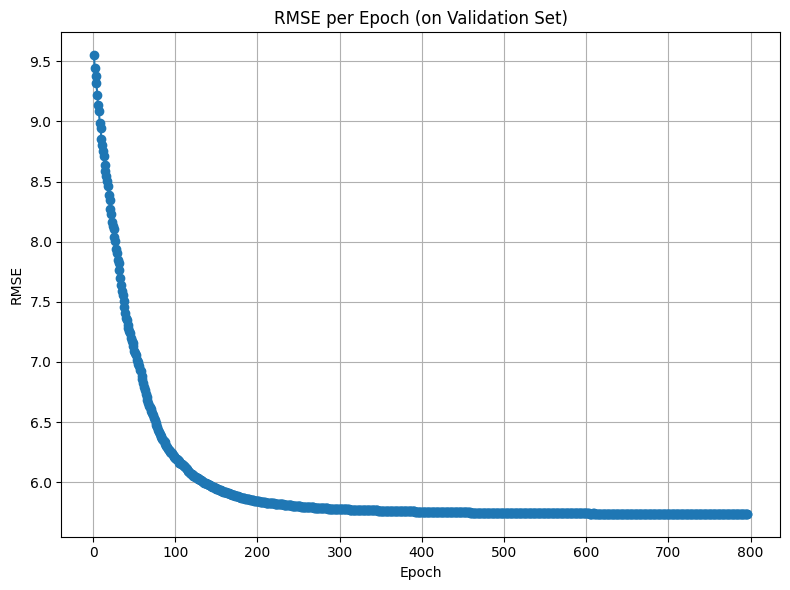

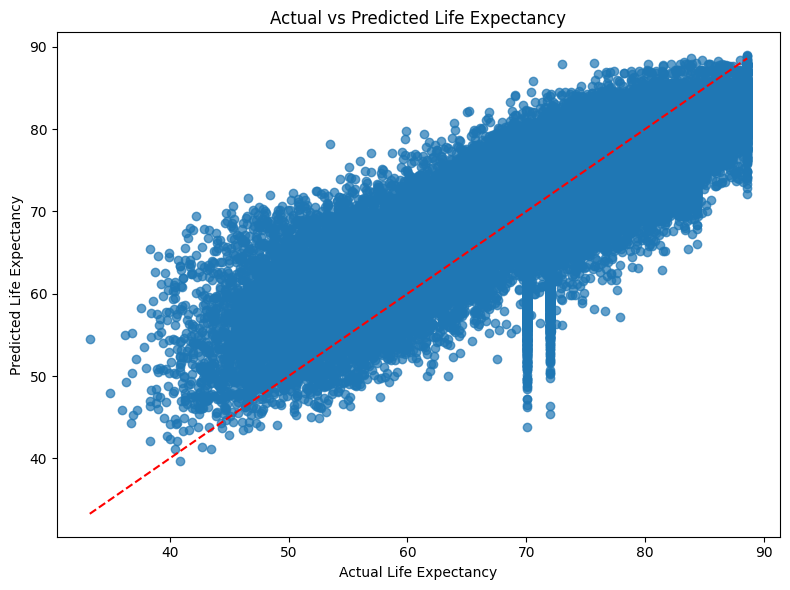

Mean Absolute Error (MAE): 4.4542750023747
Mean Absolute Percentage Error (MAPE): 0.06602506958567808
Explained Variance Score: 0.6469557187497352


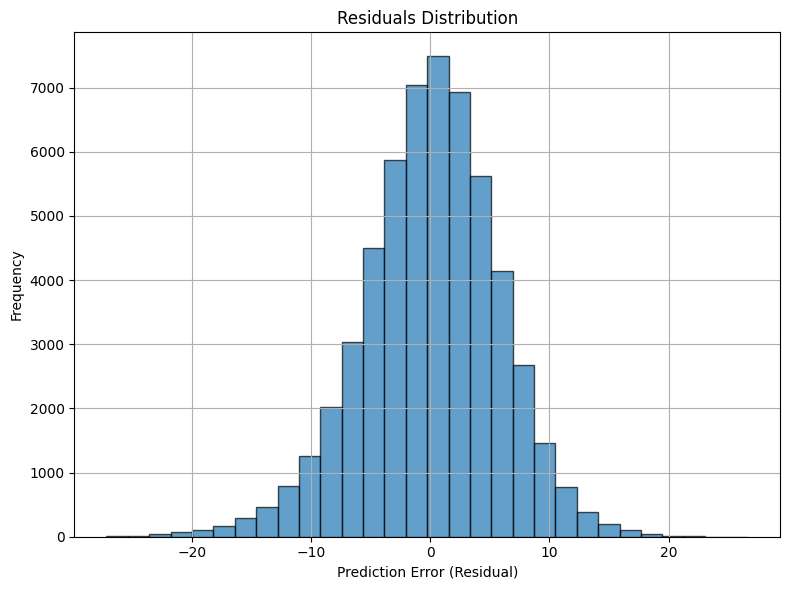

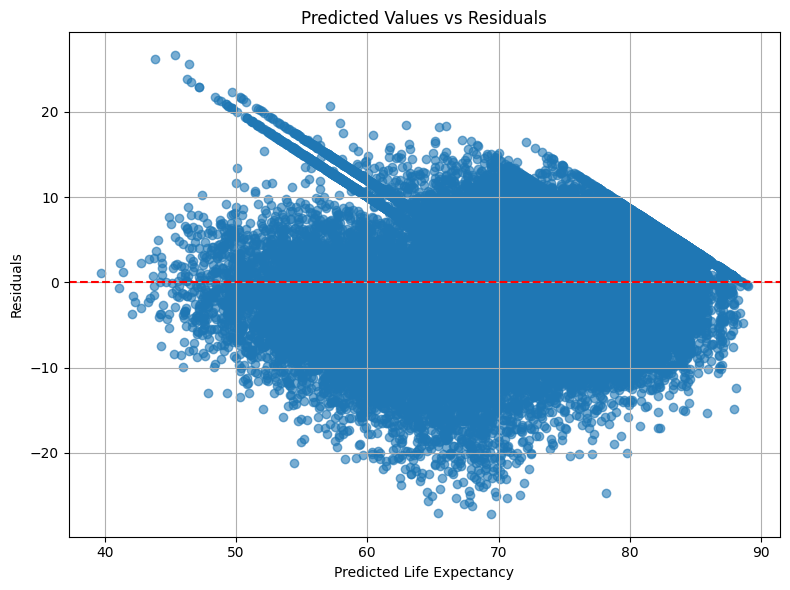

In [5]:

# ----------------------
# Feature-Target Split
# ----------------------
target_col = 'LifeExpectancy'
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in dataset.")
X = df.drop(columns=[target_col])
y = df[target_col]

# ----------------------
# Split Data
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------
# Scale Features
# ----------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------
# Hyperparameter Tuning
# ----------------------
param_dist = {
    "n_estimators": randint(100, 1000),
    "learning_rate": uniform(0.01, 0.3),
    "max_depth": randint(3, 10),
    "subsample": uniform(0.5, 0.5),
    "colsample_bytree": uniform(0.5, 0.5),
    "gamma": uniform(0, 0.5)
}

# Define XGBoost model with eval_metric inside constructor
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    random_state=42,
    early_stopping_rounds=20
)

# Randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# ----------------------
# Fit the Model
# ----------------------
random_search.fit(
    X_train_scaled,
    y_train,
    eval_set=[(X_test_scaled, y_test)],
    verbose=True
)

# ----------------------
# Best Model and Evaluation
# ----------------------
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nBest Parameters:", random_search.best_params_)
print("Final RMSE:", rmse)
print("R² Score:", r2)

# ----------------------
# Show RMSE for Each Epoch
# ----------------------
results = best_model.evals_result()
rmse_per_epoch = results['validation_0']['rmse']

print("\nRMSE per Epoch:")
for i, val in enumerate(rmse_per_epoch):
    print(f"Epoch {i+1:3d}: RMSE = {val:.5f}")

# ----------------------
# Plot RMSE over Epochs
# ----------------------
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rmse_per_epoch) + 1), rmse_per_epoch, marker='o')
plt.title("RMSE per Epoch (on Validation Set)")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------
# Plot Actual vs Predicted
# ----------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

# ----------------------
# More Regression Metrics
# ----------------------
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Explained Variance Score:", explained_var)

# ----------------------
# Residual Plot
# ----------------------
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------
# Plot Predicted vs Residuals
# ----------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Predicted Values vs Residuals")
plt.xlabel("Predicted Life Expectancy")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:

# then pick a path inside your Drive, e.g. "MyDrive/models/"
model_path  = '/content/drive/My Drive/Life expectancy - Final Project/xgb_life_expectancy_model.pkl'
scaler_path = '/content/drive/My Drive/Life expectancy - Final Project/xgb_scaler.pkl'

import joblib
joblib.dump(best_model, model_path)
joblib.dump(scaler,   scaler_path)

print("Saved to", model_path, "and", scaler_path)

Saved to /content/drive/My Drive/Life expectancy - Final Project/xgb_life_expectancy_model.pkl and /content/drive/My Drive/Life expectancy - Final Project/xgb_scaler.pkl


In [14]:
import pandas as pd
import numpy as np

# assume X_train is the DataFrame you used to fit the scaler
feature_names = X_train.columns

# build a DataFrame for the new sample, using the same column order/names
example_df = pd.DataFrame([{
    'Sex':                        1,   # Male
    'PhysicalActivities':        0,   # Yes
    'SleepHours':                8,
    'HadHeartAttack':            1,
    'HadAngina':                 0,
    'HadStroke':                 0,
    'HadAsthma':                 0,
    'HadCOPD':                   0,
    'HadDepressiveDisorder':     0,
    'HadKidneyDisease':          0,
    'HadArthritis':              0,
    'HadDiabetes':               1,
    'DeafOrHardOfHearing':       0,
    'BlindOrVisionDifficulty':   0,
    'DifficultyConcentrating':   0,
    'DifficultyWalking':         0,
    'DifficultyDressingBathing': 0,
    'DifficultyErrands':         0,
    'SmokerStatus':              3,   # Never
    'ECigaretteUsage':           0,
    'BMI':                      25.5,
    'AlcoholDrinkers':           0,
    'FluVaxLast12':              0,
    'PneumoVaxEver':             0,
    'TetanusLast10Tdap':         0,
    'HighRiskLastYear':          1    # No
}], columns=feature_names)

# scale and predict
example_scaled = scaler.transform(example_df)
predicted_life_expectancy = best_model.predict(example_scaled)

print("Predicted Life Expectancy:", predicted_life_expectancy)

Predicted Life Expectancy: [65.61089]
